# DeepLenstronomy Demo

Written by Robert Morgan

`deeplenstronomy` is a software package that let's you interact with the strong gravitational lensing simulation software `lenstronomy` in a streamlined framework. Let's take a look at how it works!

In [1]:
## Run this command and restart your kernel if necessary

#! pip install deeplenstronomy

In [1]:
import deeplenstronomy.deeplenstronomy as dl

`deeplenstronomy` works by reading user-prepared configuration files. start by specifying the configuration file you will use to make the dataset.

In [2]:
config_file = 'configs/des_gal_gal.yaml'

The configuration file is a yaml-style file for specifying all the properties of your dataset. Here is what this file contains:

In [5]:
! cat configs/des_gal_gal.yaml

DATASET:
    NAME: DES_GalaxyGalaxy_Lensing
    PARAMETERS:
        SIZE: 50
        OUTDIR: DES_GalGal

IMAGE:
    INPUT: configs/des/image.yaml
        
COSMOLOGY:
    PARAMETERS:
        H0: 70
        Om0: 0.3

SURVEY:
    INPUT: configs/des/survey.yaml


SPECIES:
    GALAXY_1:
        NAME: LENS
        LIGHT_PROFILE_1:
            NAME: SERSIC_ELLIPSE
            PARAMETERS:
                magnitude: -5.0

                center_x:
                    DISTRIBUTION:
                        NAME: uniform
                        PARAMETERS:
                            minimum: -0.03
                            maximum: 0.03
                center_y:
                    DISTRIBUTION:
                        NAME: uniform
                        PARAMETERS:
                            minimum: -0.03
                            maximum: 0.03

                R_sersic:
                    DISTRIBUTION:
                        NAME: normal
                        PARAMETERS:
           

Let's break down what the different sections mean:

<add lot's of details here>

## Simulating a Dataset

Let's put `deeplenstronomy` to work!

Start by deciding whether you want to save the dataset to files or operate in an interactive mode. 
- Set `store=True` to store the dataset in a varaible
- Set `save=True` to output the dataset as files

The default is the interactive mode with `store=True` and `save=False`. Let's work with that first.

In [3]:
dataset = dl.make_dataset(config_file)

That's it. You now have your dataset.

## Interacting with the Dataset

Now that we have a dataset, let's look at what was stored in the `dataset` variable.

The configuration labels you specified in the configuration file are stored here. The reasoning here is if you plan to do some sort of supervised classification, you will probably want to have the images labeled.

In [7]:
print(dataset.configurations)

['CONFIGURATION_1', 'CONFIGURATION_2']


The dataset name, size, and output directory are also stored as attributes of the dataset object.

In [8]:
print(dataset.name)
print(dataset.size)
print(dataset.outdir)

DES_GalaxyGalaxy_Lensing
50
DES_GalGal


There are a few other things that get stored automatically (that you can explore via `dir(dataset)`), but we'll shift our focus to the things we simulated.

The most interesting information is stored here in these attributes:

In [8]:
for item in [x for x in dir(dataset) if x[0:13] == 'CONFIGURATION']:
    print(item)

CONFIGURATION_1_images
CONFIGURATION_1_metadata
CONFIGURATION_2_images
CONFIGURATION_2_metadata


The `_images` attribute is a `numpy.ndarray` object and the `_metadata` attribute is a `pandas.DataFrame` object.

In [9]:
print(type(dataset.CONFIGURATION_1_images))
print(type(dataset.CONFIGURATION_1_metadata))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


### Images

Let's checkout some of the images in the `dataset.CONFIGURATION_1_images` attribute.

What's in this array?

In [10]:
print(dataset.CONFIGURATION_1_images.shape)

(25, 5, 100, 100)


The array dimensions are (image index, band, x_pixels, y_pixels). 

The number of images is the size of the dataset multiplied by the fraction of the dataset in CONFIGURATION_1, both of which you specify in the configuration file. The bands used is also specified in the configuration file. Finally, yup you guessed it, the image dimensions are also specified in the configuration file.

`deeplenstronomy` also has built-in vizualization functions.

Let's look at the r-band of image index 2 in CONFIGURATION_1:

<Figure size 432x288 with 0 Axes>

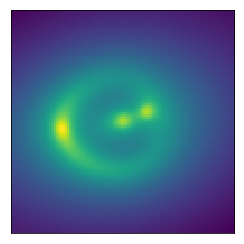

In [9]:
dl.view_image(dataset.CONFIGURATION_1_images[2][1])

You can also look at all the bands for this image at once.

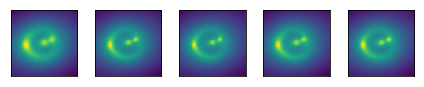

In [10]:
dl.view_image(dataset.CONFIGURATION_1_images[2])

Finally, you can convert the single band images into a single RGB image:

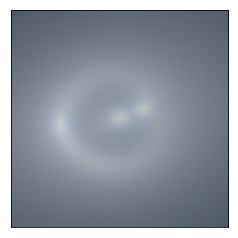

In [11]:
dl.view_image_rgb(dataset.CONFIGURATION_1_images[2])

### Metadata

Once you have an image, you may want to consider the parameters that went into its generation to better understand what you made. To check that out, you can view the metadata saved by `lenspy`.

Let's look at the properties of the metadata.

In [14]:
dataset.CONFIGURATION_1_metadata.shape

(25, 285)

Wow. That's a lot of columns. The number of columns increases with the complexity of your configurations, since there is more information for `lenspy` to keep track of. The columns are also broken up my band, so doubling the number of bands will double the number of columns in the metadata.

Let's look at the column names to see what information we have.

In [15]:
for col in dataset.CONFIGURATION_1_metadata.columns:
    print(col)

H0_g
Om0_g
exposure_time_g
numPix_g
pixel_scale_g
psf_type_g
read_noise_g
ccd_gain_g
seeing_g
magnitude_zero_point_g
sky_brightness_g
num_exposures_g
NUMBER_OF_NOISE_SOURCES_g
NOISE_SOURCE_1-NAME_g
NOISE_SOURCE_1-mean_g
CONFIGURATION_LABEL_g
CONFIGURATION_NAME_g
NUMBER_OF_PLANES_g
PLANE_1-NUMBER_OF_OBJECTS_g
PLANE_1-OBJECT_1-NAME_g
PLANE_2-NUMBER_OF_OBJECTS_g
PLANE_2-OBJECT_1-NAME_g
PLANE_1-OBJECT_1-REDSHIFT_g
PLANE_1-OBJECT_1-NUMBER_OF_LIGHT_PROFILES_g
PLANE_1-OBJECT_1-NUMBER_OF_SHEAR_PROFILES_g
PLANE_1-OBJECT_1-NUMBER_OF_MASS_PROFILES_g
PLANE_1-OBJECT_1-HOST_g
PLANE_1-OBJECT_1-LIGHT_PROFILE_1-NAME_g
PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude_g
PLANE_1-OBJECT_1-LIGHT_PROFILE_1-center_x_g
PLANE_1-OBJECT_1-LIGHT_PROFILE_1-center_y_g
PLANE_1-OBJECT_1-LIGHT_PROFILE_1-R_sersic_g
PLANE_1-OBJECT_1-LIGHT_PROFILE_1-n_sersic_g
PLANE_1-OBJECT_1-LIGHT_PROFILE_1-e1_g
PLANE_1-OBJECT_1-LIGHT_PROFILE_1-e2_g
PLANE_1-OBJECT_1-MASS_PROFILE_1-NAME_g
PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E_g
PLANE_1-OBJEC

Every individual number used in the `lenstronomy` simulation is tracked.

As well, the row index in the metadata dataframe corresponds to the image index in the image array, so you can track which image has which properties. The dataframe contents can be accessed like this:

In [16]:
dataset.CONFIGURATION_1_metadata.iloc[0:5]

,H0_g,Om0_g,exposure_time_g,numPix_g,pixel_scale_g,psf_type_g,read_noise_g,ccd_gain_g,seeing_g,magnitude_zero_point_g,...,PLANE_2-OBJECT_1-NUMBER_OF_MASS_PROFILES_Y,PLANE_2-OBJECT_1-HOST_Y,PLANE_2-OBJECT_1-LIGHT_PROFILE_1-NAME_Y,PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude_Y,PLANE_2-OBJECT_1-LIGHT_PROFILE_1-center_x_Y,PLANE_2-OBJECT_1-LIGHT_PROFILE_1-center_y_Y,PLANE_2-OBJECT_1-LIGHT_PROFILE_1-R_sersic_Y,PLANE_2-OBJECT_1-LIGHT_PROFILE_1-n_sersic_Y,PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e1_Y,PLANE_2-OBJECT_1-LIGHT_PROFILE_1-e2_Y
0,70,0.3,90.0,100,0.263,GAUSSIAN,7,6.083,1.282,30.0,...,0,None,SERSIC_ELLIPSE,14.0,2.081121,0.929392,10.124995,9.202523,0.2,-0.1
1,70,0.3,90.0,100,0.263,GAUSSIAN,7,6.083,0.962,30.0,...,0,None,SERSIC_ELLIPSE,14.0,2.440405,-0.280396,9.892424,9.458467,0.2,-0.1
2,70,0.3,90.0,100,0.263,GAUSSIAN,7,6.083,1.139,30.0,...,0,None,SERSIC_ELLIPSE,14.0,-0.664223,1.626285,8.551687,10.154787,0.2,-0.1
3,70,0.3,90.0,100,0.263,GAUSSIAN,7,6.083,1.122,30.0,...,0,None,SERSIC_ELLIPSE,14.0,1.994189,-1.321466,11.845085,9.865012,0.2,-0.1
4,70,0.3,90.0,100,0.263,GAUSSIAN,7,6.083,0.962,30.0,...,0,None,SERSIC_ELLIPSE,14.0,1.498384,-2.995897,10.078931,11.557065,0.2,-0.1


## Saving Datasets

If you are working in interactive mode, you can straightforwardly save the images array and metadata dataframe in any file format you are comfortable with.

If you instead choose to set the `save=True` option when making your dataset, let's look at what gets saved where.

In [17]:
saved_dataset = dl.make_dataset(config_file, save=True)

Recall that the dataset object has the user-specified out directory as an attribute.

In [18]:
print(saved_dataset.outdir)

DES_GalGal


Let's look in that directory.

In [19]:
! ls DES_GalGal

CONFIGURATION_1_images.npy   CONFIGURATION_2_images.npy
CONFIGURATION_1_metadata.csv CONFIGURATION_2_metadata.csv


The image arrays have been stored as numpy files. They can be loaded by doing
```python
images = numpy.load('DES_GalGal/CONFIGURATION_1_images.npy').item()
```

The metadata dataframes have been written to csv files. They can be loaded by doing
```python
metadata = pandas.read_csv('DES_GalGal/CONFIGURATION_1_metadata.csv')
```

Future versions of `lenspy` will include file format flexibility and built in dataset loading funcitons.

## The End

That's pretty much it to `deeplenstronomy`! Feel free to contact me with any suggestions or bugs.

Happy lensing!